# Phase 1 - Week 3 - Day 2 PM - Clustering: Part 2

# A. DBSCAN

In the first tutorial, we will implement DBSCAN clustering with a dataset that contains weekly sales. This dataset contains the number of sales for 51 week.

Source : [link](https://www.kaggle.com/datasets/crawford/weekly-sales-transactions)

In [1]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #turn off warning

from sklearn.preprocessing import StandardScaler

In [2]:
# Data loading

sales_transactions_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w3/P1W3D2AM%20-%20Clustering%20-%20Part%201%20-%20Sales%20Transactions.csv')
sales_transactions_df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0,1,1,0,0,1,0,0,2,0
807,P816,0,1,0,0,1,2,2,6,0,...,3,3,4,2,4,5,5,5,6,5
808,P817,1,0,0,0,1,1,2,1,1,...,2,0,0,2,2,0,0,0,4,3
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,2,0


In [3]:
# Get only the transactions

sales_df = sales_transactions_df.drop('Product_Code', axis=1)
sales_df

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,0,1,1,0,0,1,0,0,2,0
807,0,1,0,0,1,2,2,6,0,1,...,3,3,4,2,4,5,5,5,6,5
808,1,0,0,0,1,1,2,1,1,0,...,2,0,0,2,2,0,0,0,4,3
809,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,2,0


## A.1 - Dimensionality Reduction

It is evident that we have a **very large number of features**. We will try dimensionality reduction to reduce these features and retain 95 % information.

*You can change `n_components` to a different values if you want to see different performance.*

In [4]:
# Feature scaling
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(sales_df)

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(sales_scaled)
sales_scaled_pca = pca.transform(sales_scaled)

In [5]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(11)

## A.2 - Find the Optimal Hyperparameters

In DBSCAN, there are 2 important hyperparameters :
1. `eps`
   * A radius that defines the neighborhood around each data point.
   * If the distance between two points is lower or equal to eps then they are considered neighbors.
   * Small value of eps : a higher number of clusters will be created and a large part of the data will be considered as an outlier.
   * Large value of eps : various small clusters will merge into a big cluster and it will lose details.

2. `min_samples`
   * The minimum number of data points required to form a dense region within eps radius.
   * The larger the dataset, the larger value of min_samples must be chosen.
   * The minimum value of min_samples must be chosen at least 3.
   * As a general rule, the minimum min_samples should be at least on greater than the number of dimensions of the dataset as :  `min_samples >= Dimensions + 1`.

---
For `min_sample` we will use formula `Dimensions + 1`.

In [6]:
# Check the value of `min_samples`

min_samples = sales_scaled_pca.shape[1]+1
print('min_samples : ', min_samples)

min_samples :  12


---
To find the optimal value of `eps`, we can use K-Distance.

For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from `sklearn.neighbors`.

To choose a value, we can perform a sort of elbowing technique (a similar technique that is often used to determine an optimal k in K-Means clustering).

1. Let k = the number of nearest neighbors.

2. For a value of k, for each point in a dataset, calculate the average distance between each point and its k-nearest neighbors (some packages have this function built in somewhere)

3. Plot number of points on the X axis and average distances on the y axis that you calculated.

4. The resulting graph should be increasing (as long as you sort your arrays increasingly by average distance) and concave up. **There should be a point where the rate of increase jumps drastically, this point is called the elbow point and contains your optimal eps, which is the y value of the elbow point**.

5. Run this algorithm using different values of k and compare results.


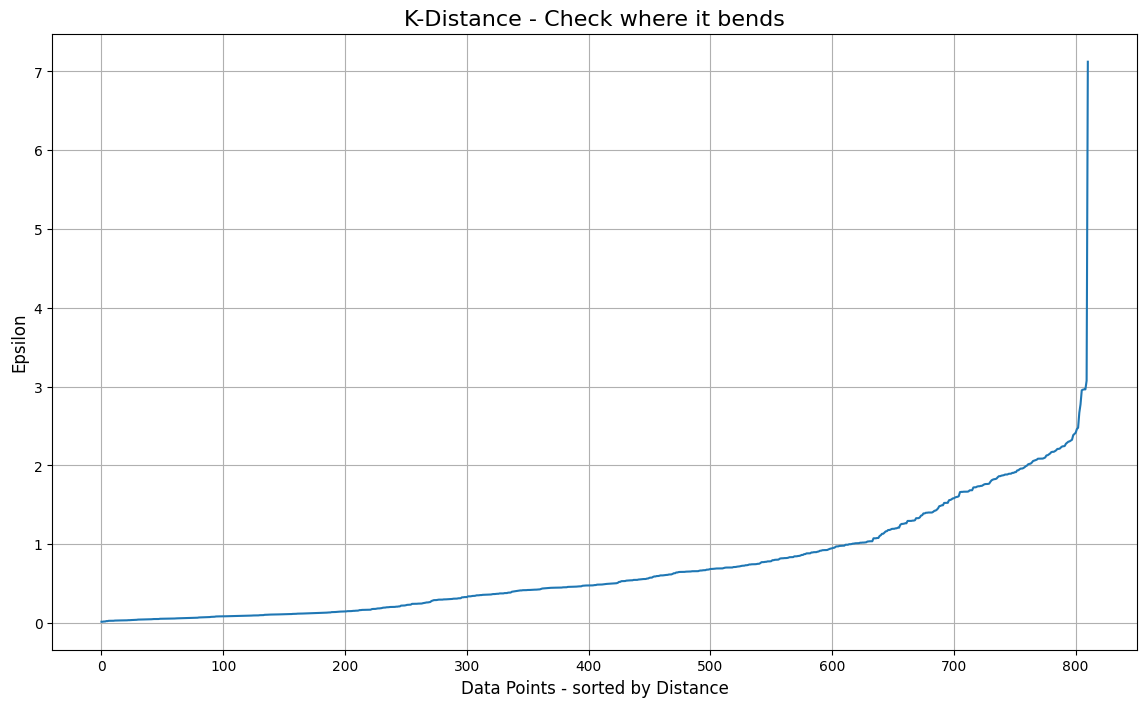

In [7]:
#Let's explore the data and work out a better setting
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(sales_scaled_pca)
distances, indices = nbrs.kneighbors(sales_scaled_pca)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.grid()
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon', fontsize=12)
plt.show()

It can be seen, when `eps=2` and `eps=3`, the line starts to climb drastically. We can try `eps` values that fall between this range to use in DBSCAN training.

---
Next, let's examine the effect of changing the epsilon value on data that is categorized as an outlier. This time we will use `50` combinations of `eps` starting from `eps=2` to `eps=3`.

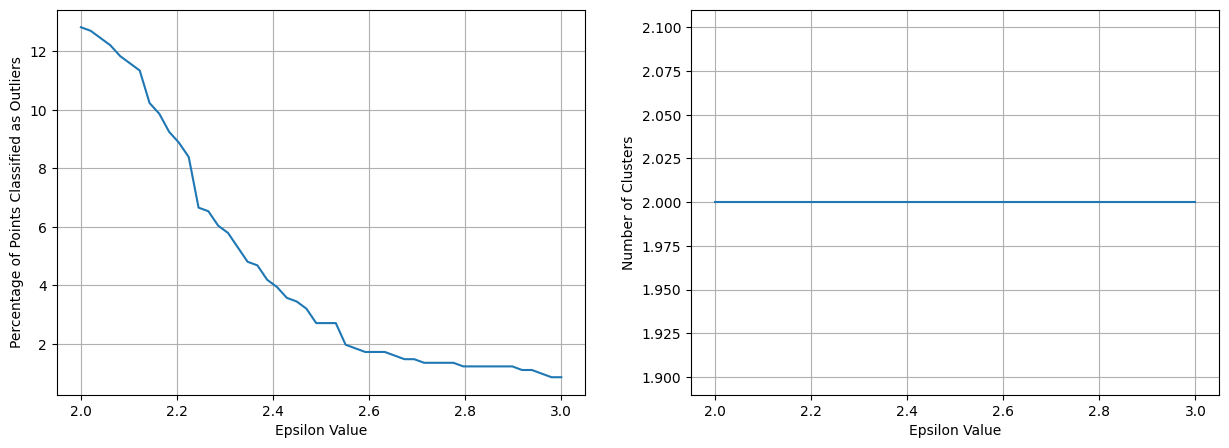

In [8]:
# Let's check the number of outliers with different eps
from sklearn.cluster import DBSCAN

## Define the `eps`
start_eps = 2
end_eps = 3
number_eps = 50 # Number of `eps` combination to try
outlier_percent = []
clusters_size = []

## Start looping
for eps in np.linspace(start_eps, end_eps, number_eps):

    ## Create Model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(sales_scaled_pca)

    ## Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    ## Get cluster size
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

    outlier_percent.append(perc_outliers)
    clusters_size.append(n_clusters)

## Plot the effect of different epsilons
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(np.linspace(start_eps, end_eps, number_eps), outlier_percent)
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Points Classified as Outliers")

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(np.linspace(start_eps, end_eps, number_eps), clusters_size)
plt.xlabel("Epsilon Value")
plt.ylabel("Number of Clusters")

plt.show()

It can be seen that the number of clusters is equal to 2 regardless of the `eps` value tried between `eps=2` to `eps=3`. However, this is different from the number of outlier percentages. Also, ask yourself a question, how much data you would consider to be outliers ?

Let's say, in this case, we will use `eps=2.6` to minimize outliers so that the outliers are less than 2%.

## A.3 - Training with the Optimal Number of Clusters

In [9]:
# DBSCAN Training

from sklearn.cluster import DBSCAN

best_dbscan = DBSCAN(eps=2.6, min_samples=min_samples)
best_dbscan.fit(sales_scaled_pca)

sales_transactions_df['cluster_dbscan'] = best_dbscan.labels_

We can check Silhouette Score from this model.

* The silhouette score is calculated utilizing the mean intra-cluster distance between points, AND the mean nearest-cluster distance.

* For instance, a cluster with a lot of data points very close to each other (high density) AND is far away from the next nearest cluster (suggesting the cluster is very unique in comparison to the next closest), will have a strong silhouette score.

* A silhouette score ranges from -1 to 1
  - `1` : the best score
  - `0`  : suggest overlapping clusters.
  - `-1` : the worst score

In [10]:
# Check how many clusters are formed
n_clusters = len(set(best_dbscan.labels_)) - (1 if -1 in best_dbscan.labels_ else 0)
print('Number of Clusters : ', n_clusters)

# Check how many data points are considered as outlier
print('Number of Outliers : ', best_dbscan.labels_[best_dbscan.labels_ == -1].size)

# Check Silhouette Score
from sklearn.metrics import silhouette_score
print('Silhouette Score   : ', silhouette_score(sales_scaled_pca, best_dbscan.labels_))

Number of Clusters :  2
Number of Outliers :  14
Silhouette Score   :  0.7029482276044415


<Axes: >

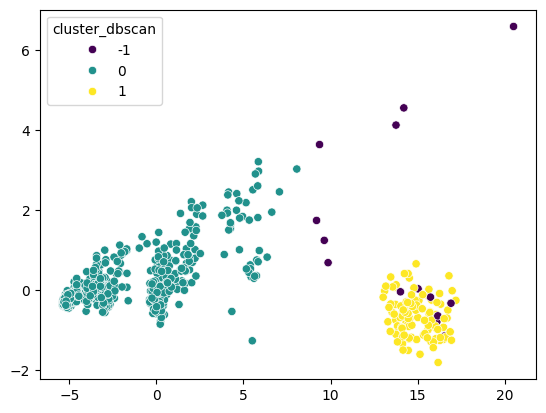

In [11]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(sales_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(sales_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=sales_transactions_df['cluster_dbscan'], palette='viridis')

There are 2 clusters, namely cluster `0` and cluster `1`. Data that are considered outliers are put into cluster `-1`.

## A.4 - Predict A cluster from An Instance

Unlike `K-Means`, **`DBSCAN()` class function does not have the prediction method to predict clusters** for new data points and test samples.

Therefore, we can write a custom function to predict the cluster label for new samples using a trained DBSCAN model.

* Calculate the distance between the new sample and all the samples in the training set.
* Find the closest sample that is within the distance threshold defined by the `eps` parameter.
* Return the cluster label of that closest sample as the predicted label for the new sample.

In [12]:
# Create a function to get nearest clusters

from sklearn.metrics import pairwise_distances

def predict_cluster(model, X_new):
    # Calculate pairwise distances between new samples and all samples in the training set
    distances = pairwise_distances(X_new, model.components_, metric=model.metric)

    # Find the index of the closest sample within eps distance
    closest_sample_indices = np.argmin(distances, axis=1)

    # Get the cluster labels of the closest samples
    closest_sample_labels = dbscan.labels_[closest_sample_indices]

    return closest_sample_labels

In [13]:
# Create an instance

data_inf = {
    'Product_Code': 'New Product',
    'W0': 12,
    'W1': 14,
    'W2': 15,
    'W3': 8,
    'W4': 13,
    'W5': 12,
    'W6': 14,
    'W7': 21,
    'W8': 6,
    'W9': 14,
    'W10': 11,
    'W11': 14,
    'W12': 16,
    'W13': 9,
    'W14': 9,
    'W15': 9,
    'W16': 14,
    'W17': 9,
    'W18': 3,
    'W19': 12,
    'W20': 5,
    'W21': 11,
    'W22': 7,
    'W23': 12,
    'W24': 5,
    'W25': 9,
    'W26': 7,
    'W27': 10,
    'W28': 5,
    'W29': 11,
    'W30': 7,
    'W31': 10,
    'W32': 12,
    'W33': 6,
    'W34': 5,
    'W35': 14,
    'W36': 10,
    'W37': 9,
    'W38': 12,
    'W39': 17,
    'W40': 7,
    'W41': 11,
    'W42': 4,
    'W43': 7,
    'W44': 8,
    'W45': 10,
    'W46': 12,
    'W47': 3,
    'W48': 7,
    'W49': 6,
    'W50': 5,
    'W51': 10,
}

data_inf = pd.DataFrame([data_inf])
data_inf

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,New Product,12,14,15,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10


In [14]:
# Preprocessing

## Drop column `Product Code`
data_inf = data_inf.drop('Product_Code', axis=1)

## Feature Scaling
data_inf_scaled = scaler.transform(data_inf)

## Dimensionality reduction using PCA
data_inf_scaled_pca = pca.transform(data_inf_scaled)
data_inf_scaled_pca

array([[ 0.54133488, -0.6522044 , -0.15893588,  0.14261922,  0.11336402,
        -0.32144131, -0.6115773 ,  0.37703958,  0.32701702, -0.45393189,
         0.26075473]])

In [15]:
# Cluster prediction

predict_cluster(best_dbscan, data_inf_scaled_pca)

array([0])